In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [3]:
data = pd.read_csv('data.csv')

In [4]:
data.head()

,Unnamed: 0,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,0,AAPL,2015-05-27 00:00:00+00:00,132.045,132.260,130.05,130.34,45833246,121.682558,121.880685,119.844118,120.111360,45833246,0.0,1.0
1,1,AAPL,2015-05-28 00:00:00+00:00,131.780,131.950,131.10,131.86,30733309,121.438354,121.595013,120.811718,121.512076,30733309,0.0,1.0
2,2,AAPL,2015-05-29 00:00:00+00:00,130.280,131.450,129.90,131.23,50884452,120.056069,121.134251,119.705890,120.931516,50884452,0.0,1.0
3,3,AAPL,2015-06-01 00:00:00+00:00,130.535,131.390,130.05,131.20,32112797,120.291057,121.078960,119.844118,120.903870,32112797,0.0,1.0
4,4,AAPL,2015-06-02 00:00:00+00:00,129.960,130.655,129.32,129.86,33667627,119.761181,120.401640,119.171406,119.669029,33667627,0.0,1.0


In [5]:
data.tail()

,Unnamed: 0,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1253,1253,AAPL,2020-05-18 00:00:00+00:00,314.96,316.50,310.3241,313.17,33843125,314.96,316.50,310.3241,313.17,33843125,0.0,1.0
1254,1254,AAPL,2020-05-19 00:00:00+00:00,313.14,318.52,313.0100,315.03,25432385,313.14,318.52,313.0100,315.03,25432385,0.0,1.0
1255,1255,AAPL,2020-05-20 00:00:00+00:00,319.23,319.52,316.2000,316.68,27876215,319.23,319.52,316.2000,316.68,27876215,0.0,1.0
1256,1256,AAPL,2020-05-21 00:00:00+00:00,316.85,320.89,315.8700,318.66,25672211,316.85,320.89,315.8700,318.66,25672211,0.0,1.0
1257,1257,AAPL,2020-05-22 00:00:00+00:00,318.89,319.23,315.3500,315.77,20450754,318.89,319.23,315.3500,315.77,20450754,0.0,1.0


In [6]:
data1 = data.reset_index()['close']

In [7]:
data1.shape

(1258,)

In [8]:
data1

0       132.045
1       131.780
2       130.280
3       130.535
4       129.960
         ...   
1253    314.960
1254    313.140
1255    319.230
1256    316.850
1257    318.890
Name: close, Length: 1258, dtype: float64

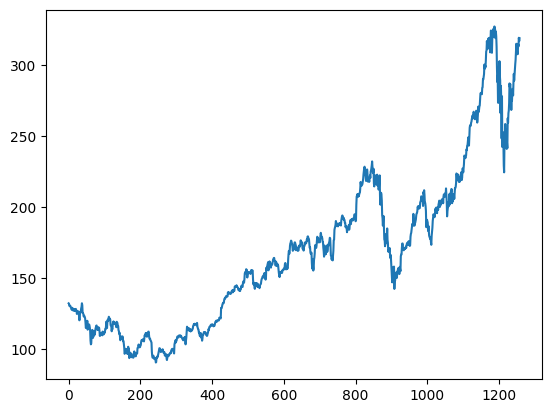

In [9]:
plt.plot(data1)

In [10]:
# LSTM are sensitive to the scale of the data. so we'apply MinMax scaler.

In [11]:
data1

0       132.045
1       131.780
2       130.280
3       130.535
4       129.960
         ...   
1253    314.960
1254    313.140
1255    319.230
1256    316.850
1257    318.890
Name: close, Length: 1258, dtype: float64

In [12]:
scaler = MinMaxScaler(feature_range=(0,1))
data1 = scaler.fit_transform(np.array(data1).reshape(-1,1))

In [13]:
data1

array([[0.17607447],
       [0.17495567],
       [0.16862282],
       ...,
       [0.96635143],
       [0.9563033 ],
       [0.96491598]])

In [14]:
# splitting dataset into train and test split
train_size = int(len(data1)*0.65)
test_size = len(data1)-train_size
train_data, test_data = data1[0:train_size,:],data1[train_size:len(data1),:1]

In [15]:
train_size,test_size

(817, 441)

In [16]:
len(train_data),len(test_data)

(817, 441)

In [17]:
train_data

array([[0.17607447],
       [0.17495567],
       [0.16862282],
       [0.1696994 ],
       [0.16727181],
       [0.16794731],
       [0.16473866],
       [0.16174111],
       [0.1581525 ],
       [0.15654817],
       [0.16271215],
       [0.1614878 ],
       [0.1554927 ],
       [0.15443722],
       [0.15730811],
       [0.15604154],
       [0.15849025],
       [0.15308621],
       [0.15735033],
       [0.15490163],
       [0.15946129],
       [0.15688592],
       [0.1537195 ],
       [0.14434687],
       [0.14812547],
       [0.15308621],
       [0.15241071],
       [0.15055307],
       [0.14924428],
       [0.13607194],
       [0.12551718],
       [0.13906949],
       [0.14911762],
       [0.14890653],
       [0.15401503],
       [0.16115005],
       [0.16583636],
       [0.17618002],
       [0.17060711],
       [0.14725998],
       [0.14700667],
       [0.14422021],
       [0.13691632],
       [0.13949168],
       [0.13784514],
       [0.13522756],
       [0.13071012],
       [0.118

In [18]:
def create_dataset(dataset,time_stemp=1):
    dataX, dataY = [],[]
    for i in range(len(dataset)-time_stemp-1):
        a = dataset[i:(i+time_stemp),0]
        dataX.append(a)
        dataY.append(dataset[i + time_stemp,0])
    return np.array(dataX), np.array(dataY)

In [19]:
time_stemp = 100
X_train, Y_train = create_dataset(train_data,time_stemp)
X_test, Y_test = create_dataset(test_data,time_stemp)

In [20]:
print(X_train.shape),print(Y_train.shape)

(716, 100)
(716,)


(None, None)

In [21]:
print(X_test.shape),print(Y_test.shape)

(340, 100)
(340,)


(None, None)

In [22]:
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1],1)

In [23]:
model = Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50851 (198.64 KB)
Trainable params: 50851 (198.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [25]:
model.fit(X_train,Y_train, validation_data=(X_test,Y_test),epochs=100, batch_size=64, verbose=1);

Epoch 1/100
12/12 [==============================] - 12s 305ms/step - loss: 0.0150 - val_loss: 0.0741
Epoch 2/100
12/12 [==============================] - 4s 356ms/step - loss: 0.0041 - val_loss: 0.0051
Epoch 3/100
12/12 [==============================] - 4s 354ms/step - loss: 0.0011 - val_loss: 0.0044
Epoch 4/100
12/12 [==============================] - 3s 264ms/step - loss: 8.5551e-04 - val_loss: 0.0062
Epoch 5/100
12/12 [==============================] - 2s 132ms/step - loss: 6.7747e-04 - val_loss: 0.0068
Epoch 6/100
12/12 [==============================] - 2s 149ms/step - loss: 6.4424e-04 - val_loss: 0.0058
Epoch 7/100
12/12 [==============================] - 2s 179ms/step - loss: 6.1873e-04 - val_loss: 0.0049
Epoch 8/100
12/12 [==============================] - 2s 138ms/step - loss: 6.1833e-04 - val_loss: 0.0051
Epoch 9/100
12/12 [==============================] - 2s 147ms/step - loss: 6.1937e-04 - val_loss: 0.0039
Epoch 10/100
12/12 [==============================] - 2s 138ms/ste

In [26]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

11/11 [==============================] - 1s 64ms/step


In [27]:
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

In [28]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(Y_train,train_predict))

141.66109397536846

In [29]:
math.sqrt(mean_squared_error(Y_test,test_predict))

239.1824696335066

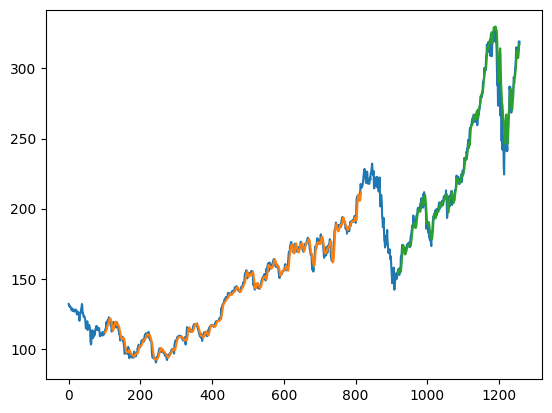

In [30]:
look_back = 100
trainpredictPlot = np.empty_like(data1)
trainpredictPlot[:, :] = np.nan
trainpredictPlot[look_back:len(train_predict)+look_back, :] = train_predict

testPredictPlot = np.empty_like(data1)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(data1)-1, :] = test_predict

plt.plot(scaler.inverse_transform(data1))
plt.plot(trainpredictPlot)
plt.plot(testPredictPlot)
plt.show()